In [193]:
import numpy as np
from numpy.fft import fft2, ifft2, fftshift
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
import scipy
from scipy.ndimage import gaussian_filter1d as gf1d
from scipy.ndimage import gaussian_filter as gf
from scipy.ndimage import uniform_filter as uf

import sys
#sys.path.append("C:\\Users\\Ryan\\Documents\\GitHub\\Differential-Dynamic-Microscopy---Python\\")
sys.path.append("C:\\Users\\rmcgorty\\Documents\\GitHub\\Differential-Dynamic-Microscopy---Python\\")
import tiff_file
import ddm_clean as ddm

In [194]:
#data_dir = "D:\\From Jon\\PIV Analysis\\2020-05-14_Actin\\20200514_actinENT_YESmyo_YESbleb_405_488OD4_100ms_4fps_1\\"
data_dir = "Y:\\Jon_Garamella\\data\\active_networks\\videos_date\\2020-05-14\\myosin_bleb\\20200514_actinENT_YESmyo_YESbleb_405_488OD4_100ms_4fps_1\\"
data_file = "20200514_actinENT_YESmyo_YESbleb_405_488OD4_100ms_4fps_1_MMStack_Pos0.ome.tif"

In [195]:
ims = tiff_file.imread(data_dir+data_file, key=[5,505,1005,1505])
print("Shape of ims is %i,%i,%i" % ims.shape)
print("So %i frames of %ix%i pixels each" % ims.shape)

Shape of ims is 4,266,1280
So 4 frames of 266x1280 pixels each


In [196]:
%matplotlib notebook

<IPython.core.display.Javascript object>


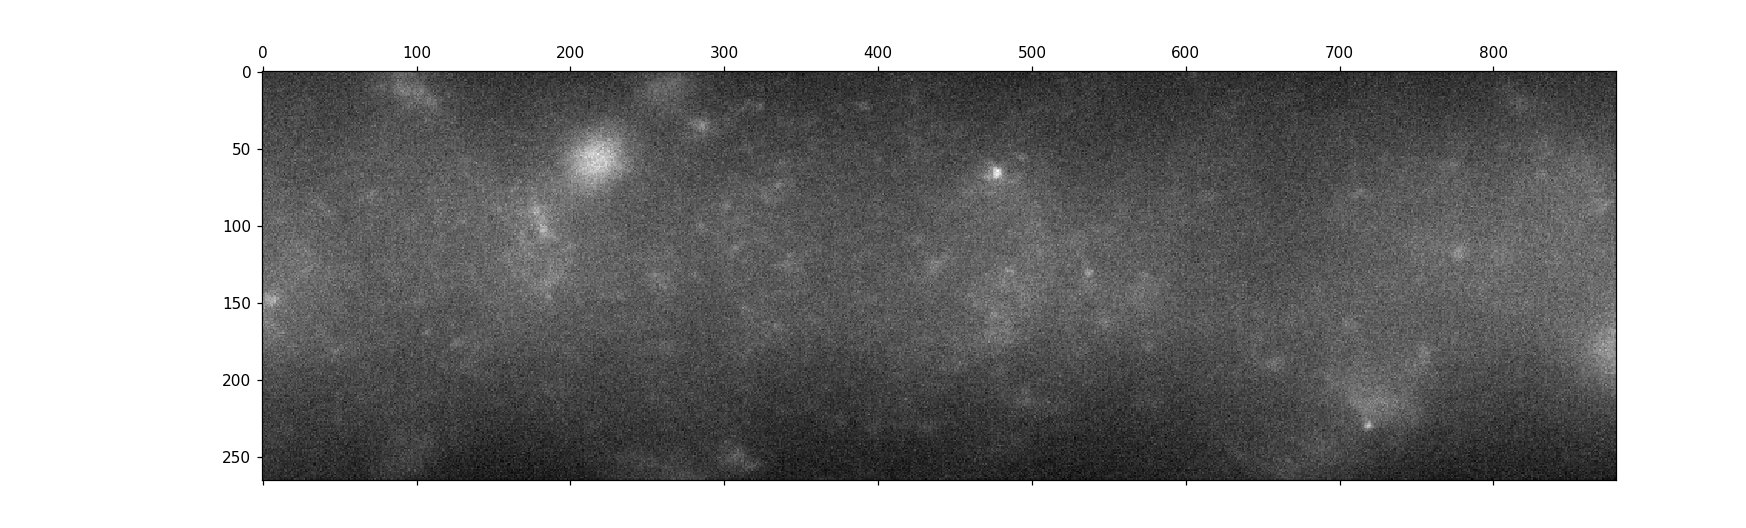

In [202]:
plt.matshow(ims[0,:,400:],cmap=cm.gray)

In [203]:
def im_corr(image, filter=False, filtersize=80):
    if filter:
        image = image*1.0 - uf(image,filtersize)
    image = 1.0*image-image.mean()
    image = image/image.std()
    corr_im = np.real(fftshift(ifft2(fft2(image)*np.conj(fft2(image)))))/(image.shape[0]*image.shape[1])
    rav_corr = ddm.newRadav(corr_im)
    return corr_im, rav_corr

In [216]:
corr_ims = np.zeros_like(ims[:,:,400:])
corr_ravs = np.zeros((ims.shape[0],400))
for i in range(ims.shape[0]):
    corr_ims[i], temp = im_corr(ims[i,:,400:], filter=True, filtersize=50)
    corr_ravs[i] = temp[:corr_ravs.shape[1]]

<IPython.core.display.Javascript object>


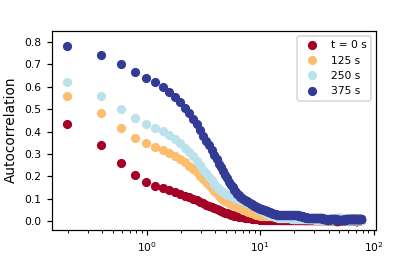

In [219]:
cmap = matplotlib.cm.get_cmap('RdYlBu')

fig, ax = plt.subplots(figsize=(3.8,3.8/1.618))
xvalues = np.arange(len(corr_ravs[0]))*0.196
ax.tick_params(axis='both', which='major', labelsize=7)
markerSize = 10
gf1dsize=2
plt.semilogx(xvalues, gf1d(corr_ravs[0],gf1dsize),'.',ms=markerSize,c=cmap(0),label="t = 0 s")
plt.plot(xvalues, gf1d(corr_ravs[1],gf1dsize),'.',ms=markerSize,c=cmap(0.33),label='125 s')
plt.plot(xvalues, gf1d(corr_ravs[2],gf1dsize),'.',ms=markerSize,c=cmap(0.67),label='250 s')
plt.plot(xvalues, gf1d(corr_ravs[3],gf1dsize),'.',ms=markerSize,c=cmap(0.99),label='375 s')
plt.xlabel("Distance ($\mu$m)",fontsize=9)
plt.ylabel("Autocorrelation",fontsize=9)
plt.legend(loc=0,fontsize=7)
plt.savefig("autocorr_frames_5-505-1005-1505.svg",dpi=600)

In [179]:
data_dir = "Y:\\Jon_Garamella\\data\\active_networks\\videos_date\\2020-06-17\\AMT\\yesmyosin\\20200617_LK16YOYO_AMT_568A_RT_samespot3\\"
data_file = "20200617_LK16YOYO_AMT_568A_RT_samespot3_MMStack_Pos0.ome.tif"

In [180]:
ims = tiff_file.imread(data_dir+data_file,key=[0,2])
print("Shape of ims is %i,%i,%i" % ims.shape)
print("So %i frames of %ix%i pixels each" % ims.shape)

Shape of ims is 2,266,1024
So 2 frames of 266x1024 pixels each


<IPython.core.display.Javascript object>


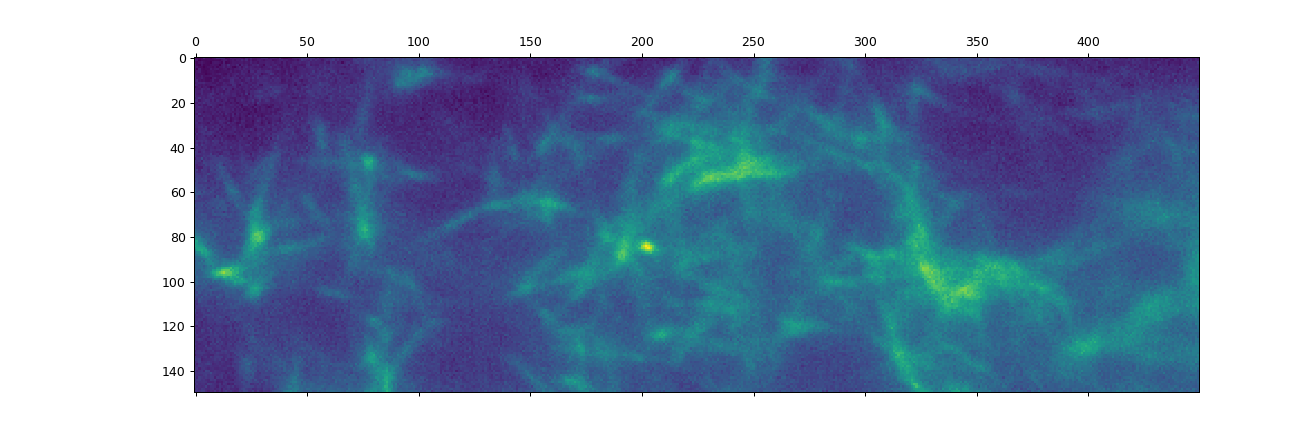

In [181]:
xstart = 329
xstop = xstart+450
ystart = 6
ystop = ystart+150


plt.matshow(ims[1,ystart:ystop,xstart:xstop])

In [25]:
ims_new = ims[:,ystart:ystop,xstart:xstop]

In [190]:
corr_ims = np.zeros_like(ims_new)
corr_ravs = np.zeros((ims_new.shape[0],220))
for i in range(ims_new.shape[0]):
    corr_ims[i], temp = im_corr(ims_new[i],filter=True,filtersize=50)
    corr_ravs[i] = temp[:corr_ravs.shape[1]]

<IPython.core.display.Javascript object>


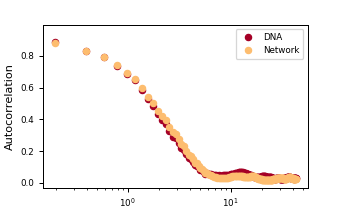

In [191]:
cmap = matplotlib.cm.get_cmap('RdYlBu')

fig, ax = plt.subplots(figsize=(3.8,3.8/1.618))
xvalues = np.arange(len(corr_ravs[0]))*0.196
ax.tick_params(axis='both', which='major', labelsize=7)
markerSize = 10
plt.semilogx(xvalues, gf1d(corr_ravs[0],1),'.',ms=markerSize,c=cmap(0),label="DNA")
plt.plot(xvalues, gf1d(corr_ravs[1],1),'.',ms=markerSize,c=cmap(0.33),label='Network')
plt.xlabel("Distance ($\mu$m)",fontsize=9)
plt.ylabel("Autocorrelation",fontsize=9)
plt.legend(loc=0,fontsize=7)
#plt.savefig("autocorr_frames_5-505-1005-1505.svg",dpi=600)

In [151]:
def just_fft(image, filter=False, filtersize=30):
    if filter:
        image = image*1.0 - gf(image,filtersize)
    image = image-image.mean()
    image = image/image.std()
    fft_im = abs(fftshift(fft2(image)*np.conj(fft2(image))))/(image.shape[0]*image.shape[1])
    rav_f = ddm.newRadav(fft_im)
    return fft_im, rav_f

In [154]:
fftim_dna, ravf_dna = just_fft(ims_new[0],True,20)
fftim_net, ravf_net = just_fft(ims_new[1],True,20)

<IPython.core.display.Javascript object>


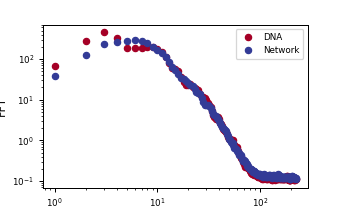

In [155]:
cmap = matplotlib.cm.get_cmap('RdYlBu')

fig, ax = plt.subplots(figsize=(3.8,3.8/1.618))
xvalues = np.arange(len(ravf))
ax.tick_params(axis='both', which='major', labelsize=7)
markerSize = 10
plt.loglog(xvalues, gf1d(ravf_dna,1),'.',ms=markerSize,c=cmap(0),label="DNA")
plt.plot(xvalues, gf1d(ravf_net,1),'.',ms=markerSize,c=cmap(0.99),label="Network")
plt.xlabel("freq ($\mu$m$^{-1}$)",fontsize=9)
plt.ylabel("FFT",fontsize=9)
plt.legend(loc=0,fontsize=7)
#plt.savefig("autocorr_frames_5-505-1005-1505.svg",dpi=600)

<IPython.core.display.Javascript object>


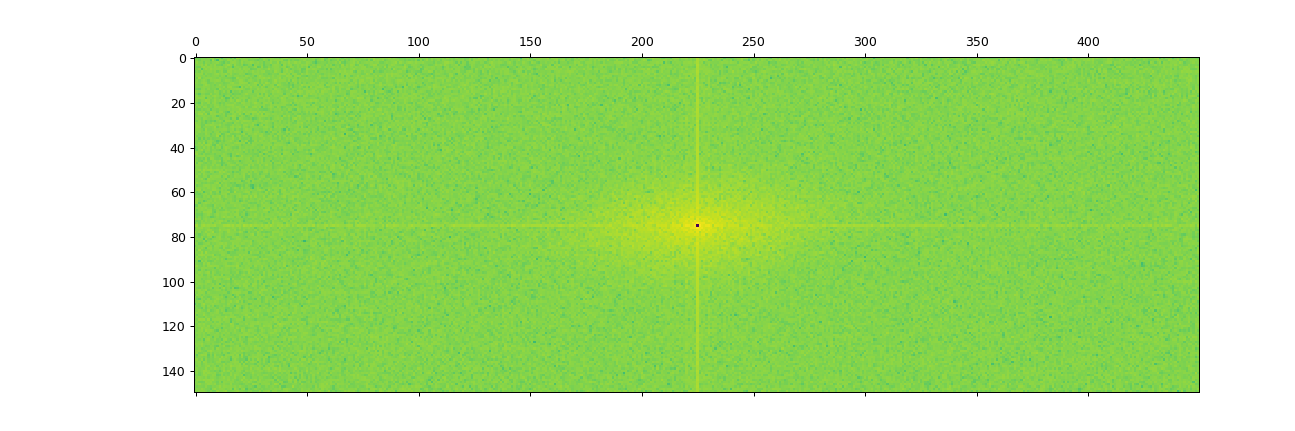

In [57]:
plt.matshow(np.log(fftim_net))

In [58]:
30/0.196


153.0612244897959

<IPython.core.display.Javascript object>


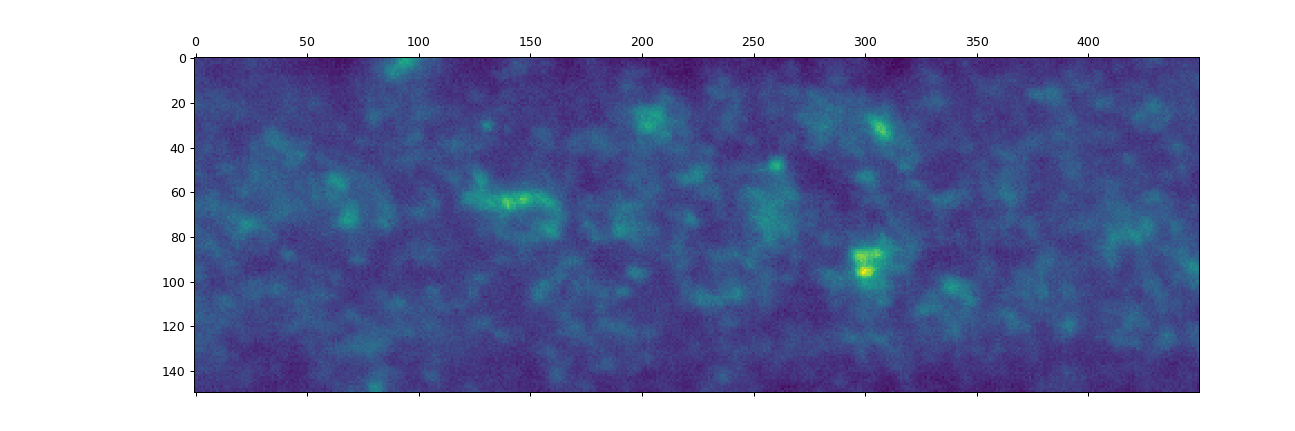

In [192]:
imtest = ims_new[0]*1.0 - uf(ims_new[0],80)
plt.matshow(imtest)

<IPython.core.display.Javascript object>


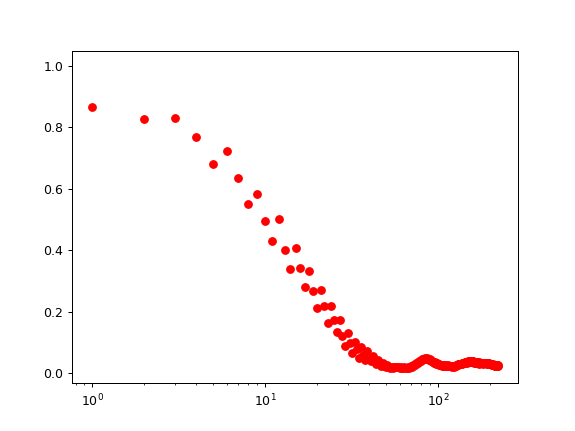

In [81]:
ctest,rtest = im_corr(imtest)
fig=plt.figure()
plt.semilogx(rtest,'ro')

In [67]:
rtest.shape

(224L,)